In [1]:
from pyslise import Pyslise2D
import matplotlib.pyplot as plt
from matplotlib import rc
import string
import numpy as np

def V6(x):
    return x**2/2+2*x**4+x**6/2

def V(x, y):
    return 2*(V6(x) + V6(y) + x*y)

N = 12
mx = 4
my = 4

p = Pyslise2D(V, -mx,mx, -my,my, tolerance=1e-9, N=N, y_count=20, steps_per_sector=8)

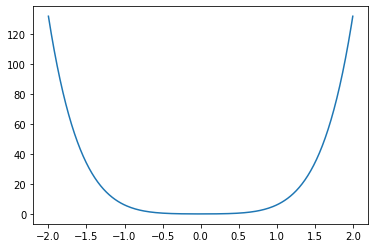

In [3]:
import matplotlib.pyplot as plt

xs = np.linspace(-2, 2, 211)
plt.plot(xs, [V(x, 0) for x in xs])

In [ ]:
sector = p.__sectors[0]

In [ ]:
xs = np.linspace(-mx, mx, 211)

rc('text', usetex=True)
rc('font', size=18)

cols = N
rows = len(p.__sectors)
fig, axes = plt.subplots(ncols=N, nrows=rows, figsize=(50, 50))

for row, sector in enumerate(p.__sectors[:rows]):
    for col, E in enumerate(sector.eigenvalues):
        f = sector.matslise.eigenfunctionCalculator(E, (0,1), (0,1))
        ax = axes[row][col]
        ax.plot(xs, [f(x)[0] for x in xs])

plt.savefig("two_sextic.png", bbox_inches='tight')

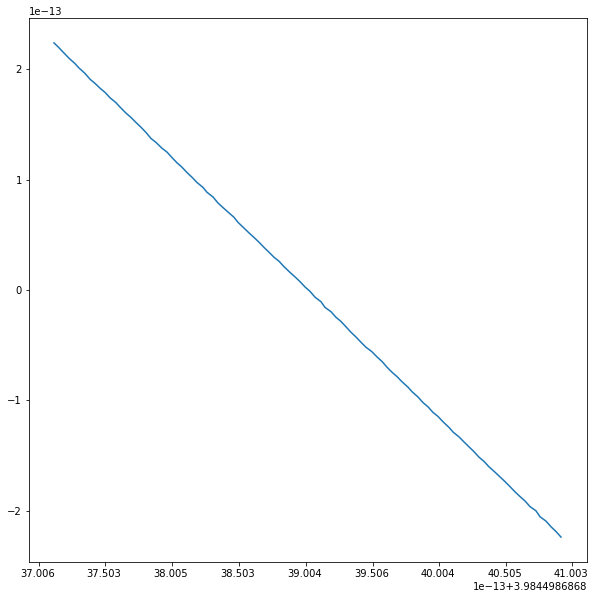

In [4]:
E = 3.9844986867739025
h = 19e-14
Es = np.linspace(E-h, E+h, 100)
plt.figure(figsize=(10,10))
plt.plot(Es, [p.__matchingError(E)[0] for E in Es])

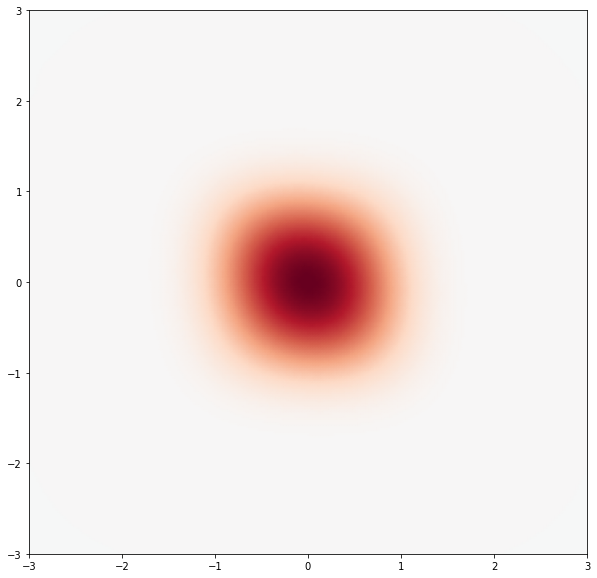

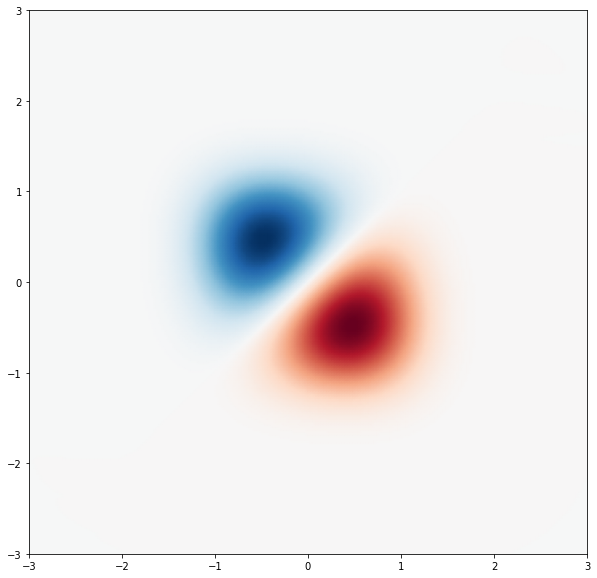

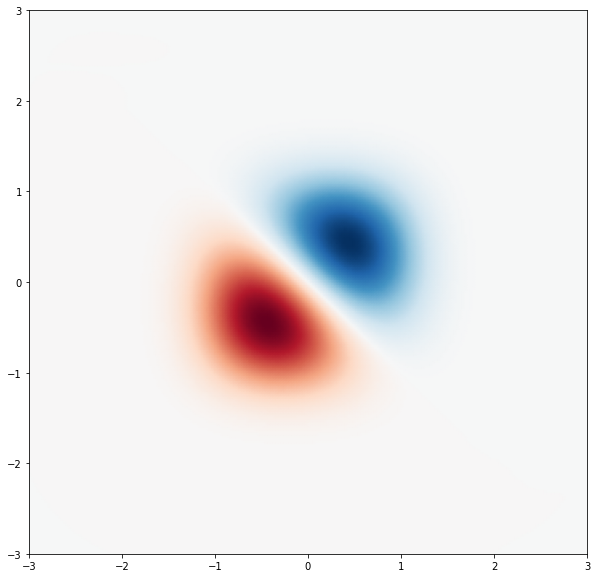

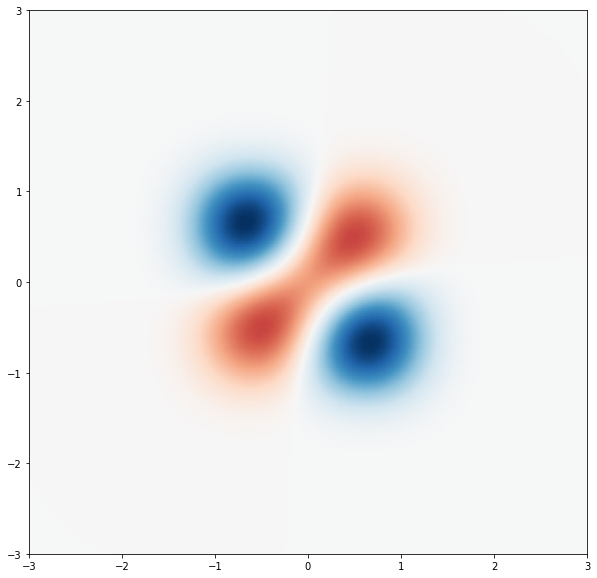

In [26]:
xs = np.linspace(-3, 3, 211)
ys = np.linspace(-3, 3, 211)

for i, E, m in p.eigenvaluesByIndex(0,3):
    f = p.eigenfunction(E)[0]
    z = f(xs, ys)
    vmax = np.max(np.abs(z))
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xs, ys, z.T, shading='gouraud', vmin=-vmax, vmax=vmax, cmap=plt.cm.RdBu)

In [17]:
E

(2, 9.399864435031027, 1)

In [7]:
Es = p.eigenvaluesByIndex(0,5)
Es

[(0, 3.9841330375564574, 1),
 (1, 8.60895051381596, 1),
 (2, 9.397349266903166, 1),
 (3, 13.793676889251095, 1),
 (4, 15.674265948731009, 1),
 (5, 15.915386598944423, 1)]

In [5]:
for i, E, m in Es:
    print(f"E_{i} ({m}) = {E/2:.9f}  ({p.eigenvalueError(E):.1e})")

E_0 (1) = 1.992066519  (2.5e-10)
E_1 (1) = 4.304475257  (1.6e-09)
E_2 (1) = 4.698674633  (1.7e-09)
E_3 (1) = 6.896838445  (4.0e-09)
E_4 (1) = 7.837132974  (7.1e-09)
E_5 (1) = 7.957693299  (6.0e-09)


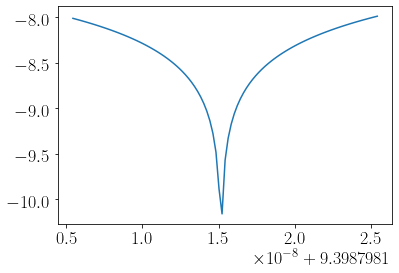

In [27]:
E = 9.398798115430901
h = 1e-8

import matplotlib.pyplot as plt
import numpy as np
from math import log10

xs = np.linspace(E-h, E+h, 101)

plt.plot(xs, [log10(p.eigenvalueError(x)) for x in xs])

In [28]:
Es = p.eigenvaluesByIndex(0, 10)
Es

[(0, 3.984498686773903, 1),
 (1, 8.61065242274276, 1),
 (2, 9.399864435031029, 1),
 (3, 13.788759065134837, 1),
 (4, 15.67249585673579, 1),
 (5, 15.926589023751864, 1),
 (6, 20.015572479513587, 1),
 (7, 21.184600396379405, 1),
 (8, 23.55958781146208, 1),
 (9, 23.603549877485175, 1),
 (10, 26.845490597200676, 1)]

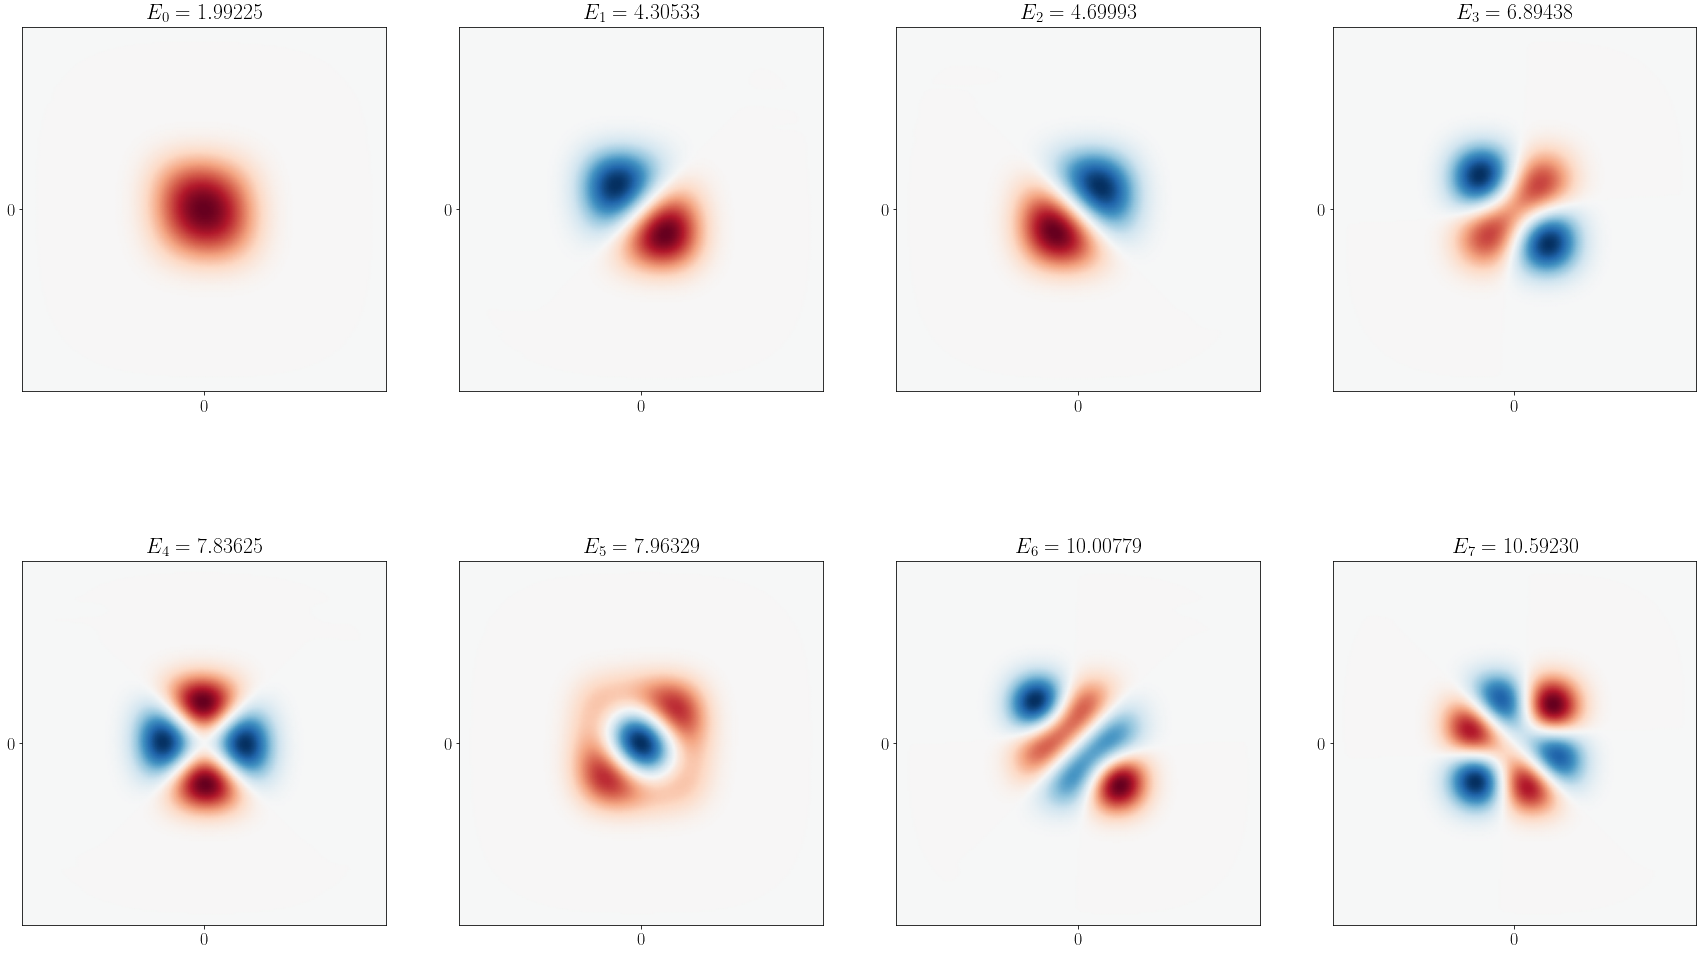

In [31]:
import matplotlib.pyplot as plt
from matplotlib import rc
import string
import numpy as np

x = np.linspace(-3.5, 3.5, 211)
y = np.linspace(-3.5, 3.5, 211)

rc('text', usetex=True)
rc('font', size=18)

cols = 4
rows = 2
fig, axes = plt.subplots(ncols=cols, nrows=rows, figsize=(30, 18))

fig_index = 0
for i, E, m in Es:
    for name, f in zip(string.ascii_lowercase, p.eigenfunction(E)):
        r = fig_index//cols
        c = fig_index%cols
        if r >= rows:
            break
        z = f(x, y)
        vmax = np.max(np.abs(z))
        ax = axes[r][c]
        ax.set_xticks(ticks=[-5,0,5])
        ax.set_yticks(ticks=[-5,0,5])
        ax.set_aspect(1)
        ax.set_title(f"$E_{{{i}{'' if m == 1 else name}}} = {E/2:.5f}$")
        ax.pcolormesh(x, y, z.T, shading='gouraud', vmin=-vmax, vmax=vmax, cmap=plt.cm.RdBu)
        fig_index += 1
    else:
        continue
    break

# plt.savefig("../images/henon_heiles_eigenfunctions.png", bbox_inches='tight')